# Actual tensorflow introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-1,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

TF_intro is the name of .npz array we want to save as 
inputs is the label assigned to generated_inputs values and targets to generated_targets

### Solving with tensorflow

In [3]:
training_data = np.load('TF_intro.npz')

<li>Linear combination + output = Layer</li>
<li>SGD => Stochastic Gradient Descent</li>
<li>Epoch => iteration over the full dataset</li>
<li>Verbose = 0 => stands for 'silent' or no output about the training is displayed</li>

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                                 bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer , loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'],epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 38.1816
Epoch 2/100
32/32 - 0s - loss: 2.7267
Epoch 3/100
32/32 - 0s - loss: 1.4282
Epoch 4/100
32/32 - 0s - loss: 0.7396
Epoch 5/100
32/32 - 0s - loss: 0.5668
Epoch 6/100
32/32 - 0s - loss: 0.4343
Epoch 7/100
32/32 - 0s - loss: 0.3604
Epoch 8/100
32/32 - 0s - loss: 0.3476
Epoch 9/100
32/32 - 0s - loss: 0.3509
Epoch 10/100
32/32 - 0s - loss: 0.3672
Epoch 11/100
32/32 - 0s - loss: 0.3789
Epoch 12/100
32/32 - 0s - loss: 0.3466
Epoch 13/100
32/32 - 0s - loss: 0.3549
Epoch 14/100
32/32 - 0s - loss: 0.3987
Epoch 15/100
32/32 - 0s - loss: 0.3900
Epoch 16/100
32/32 - 0s - loss: 0.3670
Epoch 17/100
32/32 - 0s - loss: 0.3502
Epoch 18/100
32/32 - 0s - loss: 0.3440
Epoch 19/100
32/32 - 0s - loss: 0.3635
Epoch 20/100
32/32 - 0s - loss: 0.3593
Epoch 21/100
32/32 - 0s - loss: 0.3856
Epoch 22/100
32/32 - 0s - loss: 0.3456
Epoch 23/100
32/32 - 0s - loss: 0.3501
Epoch 24/100
32/32 - 0s - loss: 0.3548
Epoch 25/100
32/32 - 0s - loss: 0.3698
Epoch 26/100
32/32 - 0s - loss: 0

### Extract the weights and the bias

acc to data generated weights should be 2 ,-3 and bias 5

In [5]:
model.layers[0].get_weights()

[array([[ 1.9487108],
        [-2.9439049]], dtype=float32),
 array([4.981948], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights 

array([[ 1.9487108],
       [-2.9439049]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.981948], dtype=float32)

### Extract the outputs ( make predictions )

These are the values that were compared to the targets to evaluate the loss function

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 29.1],
       [-11.5],
       [ 18.9],
       [ -9. ],
       [ 30.7],
       [ -3.2],
       [ 43.4],
       [ 24.7],
       [ 11.9],
       [ -6.4],
       [-19.8],
       [ -0.9],
       [ -4.6],
       [ 32.8],
       [  5.7],
       [ 17.8],
       [ 46.1],
       [ -6.4],
       [ -6.2],
       [  1. ],
       [ -2.8],
       [  9.2],
       [ 36.3],
       [ 11.5],
       [ 19.8],
       [  0.3],
       [ 21.1],
       [-13.8],
       [ 20.2],
       [ 13.1],
       [  9.5],
       [  5.1],
       [ 15. ],
       [-16.2],
       [ 17.3],
       [ 44.3],
       [ 15.1],
       [ -0.8],
       [ -0.6],
       [ 15.3],
       [ 10.5],
       [ -4.7],
       [ 36.1],
       [  6.8],
       [ 36.4],
       [ 22.6],
       [ 33.7],
       [ 10.4],
       [ 35.7],
       [ 23.3],
       [-16.2],
       [  5.8],
       [ 13.2],
       [ 22.1],
       [ 26. ],
       [-22.8],
       [  1.4],
       [ 40.9],
       [ 20.8],
       [ 28.8],
       [ -9.1],
       [ 41.7],
       [

In [9]:
training_data['targets'].round(1)

array([[ 29.4],
       [-12.1],
       [ 19.3],
       [ -8.6],
       [ 30.9],
       [ -4.2],
       [ 45.1],
       [ 26. ],
       [ 11.4],
       [ -5.7],
       [-19.5],
       [ -0.9],
       [ -5.1],
       [ 32.8],
       [  5.5],
       [ 17.6],
       [ 47.5],
       [ -5.6],
       [ -7.2],
       [  2. ],
       [ -2.7],
       [  9.4],
       [ 36.4],
       [ 10.8],
       [ 20.7],
       [  0.9],
       [ 22.3],
       [-14.7],
       [ 21. ],
       [ 12.6],
       [  9.6],
       [  4.7],
       [ 15. ],
       [-16.3],
       [ 18. ],
       [ 45.6],
       [ 15.4],
       [ -1.4],
       [ -1.3],
       [ 15.8],
       [ 10.7],
       [ -5. ],
       [ 37.5],
       [  6.1],
       [ 36.4],
       [ 23.5],
       [ 34.7],
       [ 10.3],
       [ 36.9],
       [ 23.2],
       [-16.3],
       [  5.6],
       [ 12.8],
       [ 23.3],
       [ 26.4],
       [-23.7],
       [  1. ],
       [ 42.1],
       [ 20.5],
       [ 29. ],
       [ -9.6],
       [ 42.1],
       [

## Plotting the data

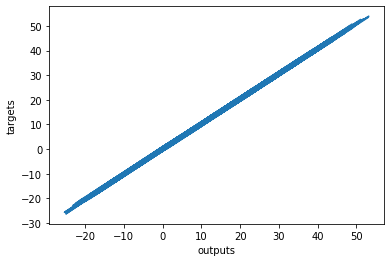

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()